I'm using the 'Customer Analytics Practice Dataset' from Kaggle, which is an enhanced version of the popular 'Mall Customers' dataset.

I start by reading the first 15 rows of the table, to get a brief understanding of the data im using.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('../data/Mall_Customers_Enhanced.csv')

df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget
5,6,Female,22,17,76,18-25,8.39,300,6,Luxury
6,7,Female,35,18,6,26-35,17.28,682,3,Budget
7,8,Female,23,18,94,18-25,6.72,300,7,Luxury
8,9,Male,64,19,3,51-65,18.62,699,6,Budget
9,10,Female,30,19,72,26-35,9.88,354,6,Luxury


In [3]:
df.info() # Get a summary of the data so I can look to clean it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Age Group               196 non-null    object 
 6   Estimated Savings (k$)  200 non-null    float64
 7   Credit Score            200 non-null    int64  
 8   Loyalty Years           200 non-null    int64  
 9   Preferred Category      200 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB


After seeing that there are 4 missing values for age group, but there was all 200 age values for the data, I decided to use a function to manually add the 4 missing age groups into the table.

In [4]:
def getAgeGroup(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 50:
        return '36-50'
    elif 51 <= age <= 65:
        return '51-65'
    elif age > 65:
        return '65+'

# Find rows with missing 'Age Group' and fill using getAgeGroup function
df['Age Group'] = df.apply(
    lambda row: getAgeGroup(row['Age']) if pd.isna(row['Age Group']) else row['Age Group'],
    axis=1
)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Age Group               200 non-null    object 
 6   Estimated Savings (k$)  200 non-null    float64
 7   Credit Score            200 non-null    int64  
 8   Loyalty Years           200 non-null    int64  
 9   Preferred Category      200 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB


 The next step to cleaning the data is to first get rid of 'CustomerID' as it will not be used by our clustering algorithm.

 Then we need to replace 'Gender', 'Preferred Category' and 'Age Group' as these are not numerical, and our model requires all input data to be numerical. I used one-hot encoding for these categorical variables as it ensures that distance calculations have impact and are meaningful 



In [5]:
df = df.drop('CustomerID', axis=1)
# Perform one-hot encoding and get rid of original categorical columns:
df = pd.get_dummies(df, columns=['Gender', 'Preferred Category', 'Age Group'], dtype=int)
df.head(15) 

,Age,Annual Income (k$),Spending Score (1-100),Estimated Savings (k$),Credit Score,Loyalty Years,Gender_Female,Gender_Male,Preferred Category_Budget,Preferred Category_Electronics,Preferred Category_Fashion,Preferred Category_Luxury,Age Group_18-25,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+
0,19,15,39,11.10,456,3,0,1,1,0,0,0,1,0,0,0,0
1,21,15,81,6.90,300,6,0,1,0,0,0,1,1,0,0,0,0
2,20,16,6,15.36,594,2,1,0,1,0,0,0,1,0,0,0,0
3,23,16,77,7.79,300,6,1,0,0,0,0,1,1,0,0,0,0
4,31,17,40,12.47,480,5,1,0,1,0,0,0,0,1,0,0,0
5,22,17,76,8.39,300,6,1,0,0,0,0,1,1,0,0,0,0
6,35,18,6,17.28,682,3,1,0,1,0,0,0,0,1,0,0,0
7,23,18,94,6.72,300,7,1,0,0,0,0,1,1,0,0,0,0
8,64,19,3,18.62,699,6,0,1,1,0,0,0,0,0,0,1,0
9,30,19,72,9.88,354,6,1,0,0,0,0,1,0,1,0,0,0


The final step is to scale the numerical categories, this is because columns such as 'Annual Income' have much larger ranges of values than 'Age', which would affect our K-means clustering algorithm

To solve this I use 'StandardScalar' from scikit-learn to standardise the data so the mean is 0 and the standard deviation is 1.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Estimated Savings (k$)', 'Credit Score', 'Loyalty Years']

df[cols] = scaler.fit_transform(df[cols])

df.head(15)

,Age,Annual Income (k$),Spending Score (1-100),Estimated Savings (k$),Credit Score,Loyalty Years,Gender_Female,Gender_Male,Preferred Category_Budget,Preferred Category_Electronics,Preferred Category_Fashion,Preferred Category_Luxury,Age Group_18-25,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+
0,-1.424569,-1.738999,-0.434801,-1.369731,-1.858538,-1.869963,0,1,1,0,0,0,1,0,0,0,0
1,-1.281035,-1.738999,1.195704,-1.567099,-2.866367,0.044675,0,1,0,0,0,1,1,0,0,0,0
2,-1.352802,-1.700830,-1.715913,-1.169544,-0.966998,-2.508176,1,0,1,0,0,0,1,0,0,0,0
3,-1.137502,-1.700830,1.040418,-1.525276,-2.866367,0.044675,1,0,0,0,0,1,1,0,0,0,0
4,-0.563369,-1.662660,-0.395980,-1.305352,-1.703488,-0.593538,1,0,1,0,0,0,0,1,0,0,0
5,-1.209269,-1.662660,1.001596,-1.497081,-2.866367,0.044675,1,0,0,0,0,1,1,0,0,0,0
6,-0.276302,-1.624491,-1.715913,-1.079319,-0.398480,-1.869963,1,0,1,0,0,0,0,1,0,0,0
7,-1.137502,-1.624491,1.700384,-1.575558,-2.866367,0.682888,1,0,0,0,0,1,1,0,0,0,0
8,1.804932,-1.586321,-1.832378,-1.016349,-0.288652,0.044675,0,1,1,0,0,0,0,0,0,1,0
9,-0.635135,-1.586321,0.846310,-1.427062,-2.517503,0.044675,1,0,0,0,0,1,0,1,0,0,0


Now I need to start the machine learning model process

I am going to be using K-means, which groups customers into clusters. To find the optimal number of clusters I use the elbow method to test different numbers of clusters and their corresponding WCSS (A measure of how tightly packed clusters are).


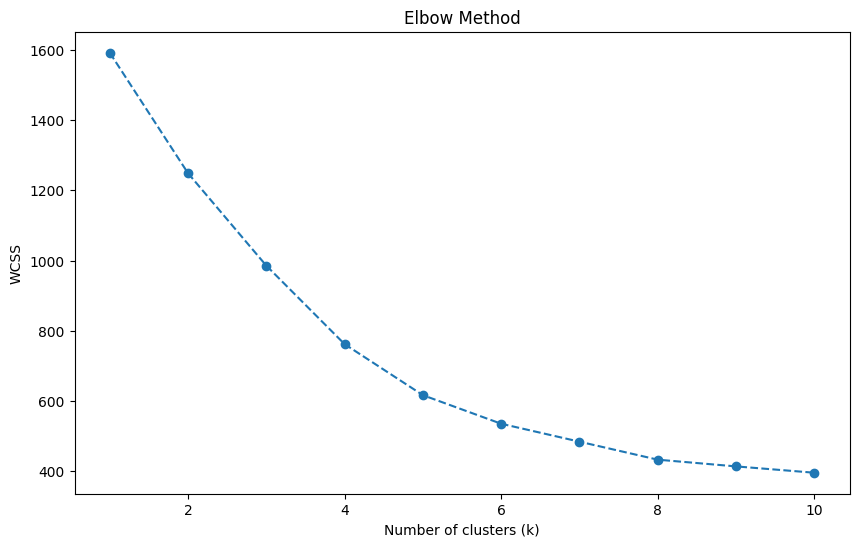

In [7]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

Using the graph, I decided the most optimal number of clusters is 5, this is because this point is where the curve in the graph changes direction, and adding more clusters does not provide a significant benefit.

Now that we have an optimal k value, we continue with training the k-means algorithm

In [8]:
kmeansModel = KMeans(n_clusters=5, init='k-means++', random_state=42)

values = kmeansModel.fit_predict(df)
df['Cluster'] = values

print(df['Cluster'].value_counts()) #Gets number of customers in each cluster

df.head(15)


Cluster
0    63
1    39
3    39
4    31
2    28
Name: count, dtype: int64


,Age,Annual Income (k$),Spending Score (1-100),Estimated Savings (k$),Credit Score,Loyalty Years,Gender_Female,Gender_Male,Preferred Category_Budget,Preferred Category_Electronics,Preferred Category_Fashion,Preferred Category_Luxury,Age Group_18-25,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,Cluster
0,-1.424569,-1.738999,-0.434801,-1.369731,-1.858538,-1.869963,0,1,1,0,0,0,1,0,0,0,0,2
1,-1.281035,-1.738999,1.195704,-1.567099,-2.866367,0.044675,0,1,0,0,0,1,1,0,0,0,0,2
2,-1.352802,-1.700830,-1.715913,-1.169544,-0.966998,-2.508176,1,0,1,0,0,0,1,0,0,0,0,3
3,-1.137502,-1.700830,1.040418,-1.525276,-2.866367,0.044675,1,0,0,0,0,1,1,0,0,0,0,2
4,-0.563369,-1.662660,-0.395980,-1.305352,-1.703488,-0.593538,1,0,1,0,0,0,0,1,0,0,0,2
5,-1.209269,-1.662660,1.001596,-1.497081,-2.866367,0.044675,1,0,0,0,0,1,1,0,0,0,0,2
6,-0.276302,-1.624491,-1.715913,-1.079319,-0.398480,-1.869963,1,0,1,0,0,0,0,1,0,0,0,3
7,-1.137502,-1.624491,1.700384,-1.575558,-2.866367,0.682888,1,0,0,0,0,1,1,0,0,0,0,2
8,1.804932,-1.586321,-1.832378,-1.016349,-0.288652,0.044675,0,1,1,0,0,0,0,0,0,1,0,0
9,-0.635135,-1.586321,0.846310,-1.427062,-2.517503,0.044675,1,0,0,0,0,1,0,1,0,0,0,2


As you can see we now have 5 clusters in which customers can be grouped into, you can see how many customers are in each cluster.

To get a better look I'm going to get the average of every attribute in each cluster using the original dataset, so we can see without the standardised values

In [9]:
original_df = pd.read_csv('../data/Mall_Customers_Enhanced.csv')
original_df = original_df.drop('CustomerID', axis=1)

original_df['Cluster'] = values

#Split the categories up as we cannot use mean on categorical data
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Estimated Savings (k$)', 'Credit Score', 'Loyalty Years']
categorical_cols = ['Gender','Preferred Category'] #Don't use age group as it's not relevant here

numerical_summary = original_df.groupby('Cluster')[numerical_cols].mean().round(2)
categorical_summary = original_df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])


summary = pd.concat([numerical_summary, categorical_summary], axis=1)
summary['Count'] = original_df['Cluster'].value_counts().sort_index()

summary


,Age,Annual Income (k$),Spending Score (1-100),Estimated Savings (k$),Credit Score,Loyalty Years,Gender,Preferred Category,Count
Cluster,,,,,,,,,
0,54.29,48.86,42.14,34.16,760.92,7.06,Female,Electronics,63
1,32.69,86.54,82.13,39.20,830.82,6.87,Female,Luxury,39
2,26.43,25.86,72.00,13.36,410.50,5.89,Female,Luxury,28
3,24.95,55.85,40.21,40.81,783.38,4.05,Female,Fashion,39
4,43.94,88.94,19.29,77.52,850.00,4.84,Male,Electronics,31


We now have the averages of the values for every cluster, I also plot the clusters underneath to visualise them and see how well-separated they are.
Since our dataset has many features, just picking 2 and plotting them on a 2D graph is not as optimal. Instead we use PCA (Principal Component Analysis)

PCA takes all the attributes in our data and uses them to create principal components. I use 2 principal components so I can plot the clusters in a 2D graph and also take into account all the features in our data.

As you can see underneath, our clusters are well defined and generally stay grouped together 

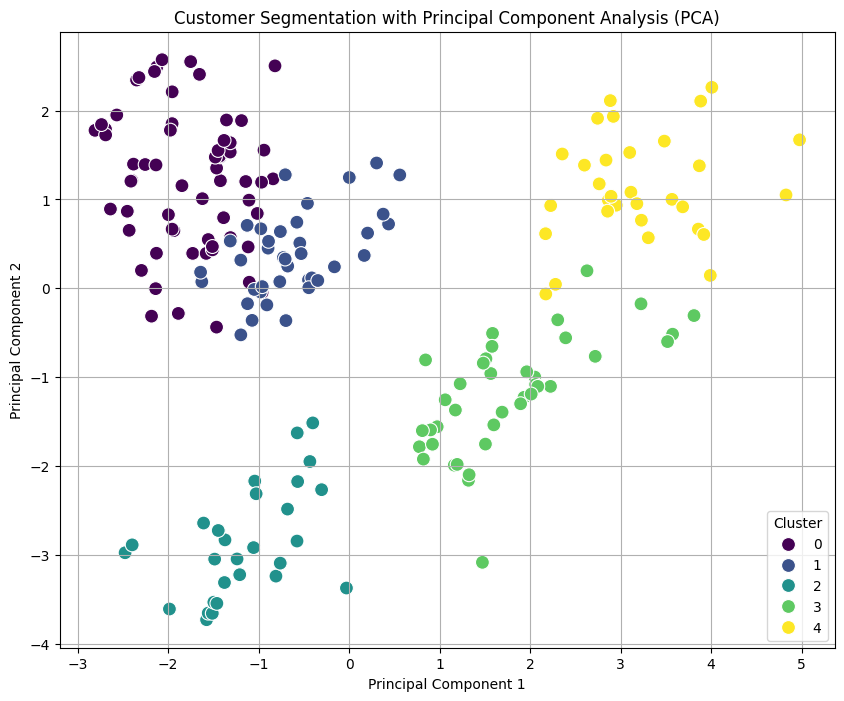

In [10]:
from sklearn.decomposition import PCA

# Fit PCA to the data and reduce it to 2 components
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df)

original_df['PCA1'] = df_pca[:, 0]
original_df['PCA2'] = df_pca[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=original_df, palette='viridis', s=100)
plt.title('Customer Segmentation with Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Now using all our data, we can complete our goal of grouping the customers

Cluster 0: **Established customers**

These customers represent a large number of the customer base and prefer electronics. They are loyal and financially stable, however their spending is not as high, and not a priority. They could be targetted when doing loyalty deals, as well as offers on expensive electronics.

Cluster 1: **High-earning customers**

These customers have very high income, however they are not spending their money at this shop, they also prefer electronics. They are a prime target for high-end marketing campaigns, that include exclusive products which are intended to make them spend more.

Cluster 2: **Young high-spenders**

These customers are young, with a low income however spend a lot at the store, primarily shopping luxury items. This group is highly infleunced by trends and they are willing to spend a signficant portion of their income. They could be targeted for offers specific to new products and limited-time products.

Cluster 3: **Fashionable spenders**

These are the store's most valuable customers as they have a high income and also spend a lot at the shop, again primarily focusing on luxury items. Marketing here should focus on special services and various offers to maintain their loyalty and high spending habits.

Cluster 4: **Budget spenders**

These customers are young with a decent income, however they are careful when spending. They prefer fashion items. Marketing efforts should be made to encourage more spending through offers and promotions as there is a lot of opportunity here.

In [11]:
import joblib

model_file_path = '../machine_model.pkl'

joblib.dump({
    'kmeans_model': kmeansModel,
    'scaler': scaler,
    'pca': pca
}, model_file_path)

# Saving model to use for the app.

['../machine_model.pkl']